#Haotian Wu

# MTH9875 Homework 5

Assigned: October 1, 2015.
Due: October 15, 2015 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Tai-Ho Wang and Jim Gatheral by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

## An empirical SPX volatility surface

Friday, September 16, 2011 was triple witching day for SPX options and futures.  Thus, the volatility surface as of the close on the 15th, that includes September options expiring the following morning, should have a shape just as interesting as the one shown in Figure 3.2 of The Volatility Surface.  Indeed more interesting, because the term structure of volatility was downwards sloping.

###1. (3 points)
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
Derive the put-call parity formula for European options in the form

$$
C-P=PV\,(F-K)
$$ 

where $C$ is the call price, $P$ is the put price, $F$ is the forward price, $K$ is the strike and $PV$ is the discount factor.

###Answer:

We consider two portfolios:

* Portfolio A: one European call and cash $C + K PV$ .

* Portfolio B: one European put and one share $P + F PV$.

At time T, both are worth $PV max(F ,K)$.

Hence they should also have identical values today, that is

$$
C + K PV=P + F PV
$$ 

Therefore,
$$
C-P=PV\,(F-K)
$$ 




### Download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")
source("BlackScholes.R")
source("Heston2.R")

###2.  (8 points) 

Given $n$ option strikes from a given expiration $T$, write R-code to take the $2\,n$ option prices and return $F$ and $PV$ for that expiration (obviously you need at least two strikes).  Test your code on the following prices for European options expiring in 36 days:

| Strike | Call price | Put price |
|--------|---------:|----------:|
| 1190 | 52.23 | 37.51 | 
| 1195 | 49.11 | 39.34 | 
| 1200 | 46.59 | 41.52 | 
| 1205 | 43.13 | 42.55 | 
| 1210 | 40.21 | 45.40 | 
| 1215 | 37.45 | 47.57 | 
  



With the resulting values of $F$ and $PV$, and using the implied volatility calculator in *BlackScholes.R*, compute implied volatilities for the above options.  Display these by adding a column to the above table.

In [29]:
T <- 36.0/365.0
CallPrices <- c(52.23,49.11,46.59,43.13,40.21,37.45)
PutPrices <- c(37.51,39.34,41.52,42.55,45.40,47.57)
Ks <- c(1190,1195,1200,1205,1210,1215)

In [30]:
Regressions = lm((CallPrices-PutPrices)~Ks)
PV = -Regressions$coeff[[2]]
F = Regressions$coeff[[1]]/PV
Iters <- c(1,2,3,4,5,6)
ImpliedVols <- sapply(Iters,function(x){BSImpliedVolCall(F*PV, Ks[x], T,log(PV)/(-T), CallPrices[x])})

In [31]:
data.frame(Ks, CallPrices, PutPrices, ImpliedVols)

,Ks,CallPrices,PutPrices,ImpliedVols
1,1190,52.23,37.51,0.2984816
2,1195,49.11,39.34,0.2950218
3,1200,46.59,41.52,0.2950292
4,1205,43.13,42.55,0.2881578
5,1210,40.21,45.4,0.2843159
6,1215,37.45,47.57,0.2809337


### Download code for problem 3.

The following code loads the file *spxData110915.rData* into your working directory and sources *plotIvols.R* which has implied volatility smile plotting functionality.

In [4]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/MTH9875_4_rFiles.zip", destfile="rFiles4.zip")
unzip(zipfile="rFiles4.zip")

download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2014/09/spxOptionMetrics.rData_.zip", destfile="spxOptionMetrics.rData.zip")
unzip(zipfile="spxOptionMetrics.rData.zip")

source("plotIvols.R")

Warning message:
: package 'stinepack' was built under R version 3.1.3

*spxOptionMetrics.rData* contains in particular the data frame `spxData110915` which has all SPX options closing prices as of September 15, 2011.  Data is from OptionMetrics (http://www.optionmetrics.com/index.html) via WRDS (http://wrds-web.wharton.upenn.edu/wrds/).

Note that SPX strike prices are out by a factor of 1000.

In [78]:
load("spxOptionMetrics.rData")

# Inspect the raw data
head(spxData110915[,1:10])

,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,best_offer
2559920,108105,20110915,SPX 110917C100000,1,20110917,20110815,C,100000,1106.4,1110
2559921,108105,20110915,SPX 110917C1000000,1,20110917,20110915,C,1000000,206.4,210
2559922,108105,20110915,SPX 110917C1005000,1,20110917,20110829,C,1005000,200.2,204.1
2559923,108105,20110915,SPX 110917C1010000,1,20110917,20110829,C,1010000,195.2,199.1
2559924,108105,20110915,SPX 110917C1015000,1,20110917,20110912,C,1015000,190.2,194.1
2559925,108105,20110915,SPX 110917C1020000,1,20110917,20110909,C,1020000,186.5,190.1


###3.  (20 points) 

(a)
Write a function in R called *generateIvols* that inputs *spxData110915* and outputs bid and offer implied volatilities for all strikes and expirations in a data frame that has the same format as the dataframe `spxOptData` from Lecture 5.


(b)
Plot your results using *plotIvols()*; your picture should look something like Figure 6 in the lecture slides (without the orange SVI fit of course).


In [225]:
generateIvols <- function(rowData){
    rowData=rowData[2:10]
    rowData[c("Expiry","Strike","Fwd","Bid","Ask","Texp")] <- NA
    rowData$Expiry <-rowData$exdate
    rowData$Texp <- as.numeric(strptime(rowData$exdate, format="%Y%m%d") - strptime(rowData$date, format="%Y%m%d"))/365.0
    EachExpiry <- function(rowDataTexp){
        rowDataTexpC <- rowDataTexp[rowDataTexp$cp_flag=="C",]
        rowDataTexpP <- rowDataTexp[rowDataTexp$cp_flag=="P",]
        Ks <- rowDataTexpC$strike_price/1000.0
        rowDataTexpC$Strike <- Ks
        rowDataTexpP$Strike <- Ks
        CallPrices <- 0.5*(rowDataTexpC$best_bid+rowDataTexpC$best_offer)
        PutPrices <- 0.5*(rowDataTexpP$best_bid+rowDataTexpP$best_offer)
        Regressions = lm((CallPrices-PutPrices)~Ks)
        PV = -Regressions$coeff[[2]]
        F = Regressions$coeff[[1]]/PV
        T=rowDataTexpC$Texp[1]
        rowDataTexpC$Fwd <- F
        rowDataTexpP$Fwd <- F
        Iters <- seq(1,length(rowDataTexpC$cp_flag),by=1)
        rowDataTexpC$Bid <- sapply(Iters,function(x){BSImpliedVolCall(F*PV, Ks[x], T,log(PV)/(-T), rowDataTexpC$best_bid[x])})   
        rowDataTexpC$Ask <- sapply(Iters,function(x){BSImpliedVolCall(F*PV, Ks[x], T,log(PV)/(-T), rowDataTexpC$best_offer[x])})  
        rowDataTexpP$Bid <- sapply(Iters,function(x){BSImpliedVolPut(F*PV, Ks[x], T,log(PV)/(-T), rowDataTexpP$best_bid[x])})   
        rowDataTexpP$Ask <- sapply(Iters,function(x){BSImpliedVolPut(F*PV, Ks[x], T,log(PV)/(-T), rowDataTexpP$best_offer[x])}) 
        rowDataTexp[rowDataTexp$cp_flag=="C",] <- rowDataTexpC
        rowDataTexp[rowDataTexp$cp_flag=="P",] <- rowDataTexpP
        return (rowDataTexp)
    }
    exdates = unique(rowData$exdate)
    for (i in 1:length(exdates)){
        rowData[rowData$exdate==exdates[i],] <- EachExpiry(rowData[rowData$exdate==exdates[i],])
    }
    return (rowData[1:15])
}


In [233]:
generateIvols(spxData110915)[40:45,10:15]

,Expiry,Strike,Fwd,Bid,Ask,Texp
2559959,20110917,1190,1207.652,0.1610426,0.2636581,0.005479452
2559960,20110917,1195,1207.652,0.1419095,0.2434814,0.005479452
2559961,20110917,1200,1207.652,0.1943425,0.2188802,0.005479452
2559962,20110917,1205,1207.652,0.1564396,0.1963024,0.005479452
2559963,20110917,1210,1207.652,0.1595785,0.1992189,0.005479452
2559964,20110917,1215,1207.652,0.1652528,0.1977762,0.005479452


$expiries
 [1] 0.005479452 0.021917808 0.041095890 0.101369863 0.178196347 0.254908676
 [7] 0.290525114 0.504109589 0.539726027 0.753424658 0.789041096 1.271347032
[13] 1.769863014 2.268607306

$atmVol
 [1] 0.1779891 0.3032678 0.2952338 0.2824867 0.2878321 0.2849292 0.2854094
 [8] 0.2799286 0.2808496 0.2759345 0.2762182 0.2686831 0.2649695 0.2633060

$atmSkew
 [1] -1.3003211 -1.2615977 -1.0912598 -0.8863560 -0.6632888 -0.6116906
 [7] -0.5416827 -0.4531628 -0.4207039 -0.3399245 -0.3526073 -0.2875441
[13] -0.2527104 -0.2051341

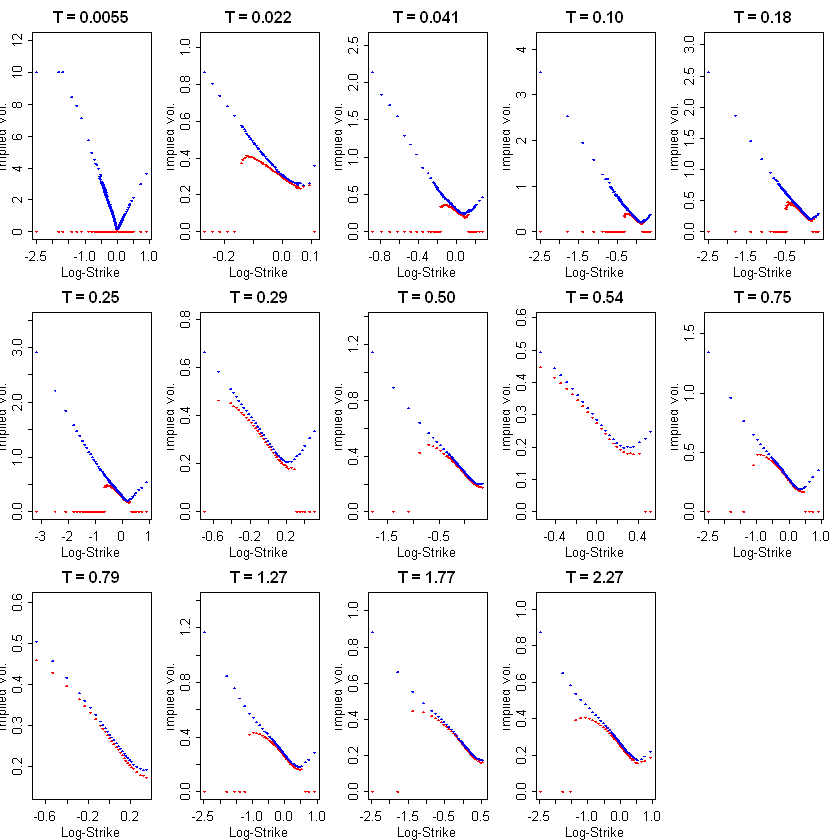

In [232]:
volSelect <- generateIvols(spxData110915)
volSelect <- volSelect[volSelect$cp_flag=="C",][,10:15]
volSelect <- volSelect[with(volSelect, order(Texp, Strike)), ]
plotIvols(volSelect)

##Rough calibration of the Heston parameters

###4.  (20 points) 

(a)
Using the Lecture 5 R-code as a base, write R-code to fit the approximate formula (23) for ATM variance skew to the empirical ATM skew estimates in Table 2. 


(b)
Using your code from (a) and all the points, assuming $\rho=-0.7$, estimate the Heston parameters $\lambda$ and $\eta$. How similar are your estimates the Heston parameters $\lambda$ and $\eta$ to the estimates from September 2005 listed in Table 3 of Lecture 5?  Are Heston fitted parameters stable over time?


(c)
Repeat (a) and (b) dropping the first three rows of Table 2, as in Lecture 5.


(d) Fit a power law of the form $A/T^\alpha$ to the ATM variance skew data (all points).


(e) 
Superimpose graphs of your resulting ATM skew fits from (b), (c), and (d) to generate a plot like Figure 8 of Lecture 5.


(f)
Amend the plotIvols() code (renaming it plotIvolsHeston(..)) to take data and Heston parameters as input and superimpose Heston smiles on the empirical smiles.  Using your fitted parameters from (f) to get a picture like Figure 6 (except that Heston doesn't fit!). (You may have to vectorize the *impvolHeston* function to get this to work in the iPython notebook.)

(g) 
Note that the Heston smiles are consistently below the empirical smiles.  Why is that? How do Heston skews compare with empirical skews?

In [260]:
#(a)
skewHeston <- function(skewParams,texp){

    rhoeta <- skewParams[1]
    lam <- skewParams[2]
    lt <- lam*texp
    skew <- rhoeta/lt*(1-(1-exp(-lt))/lt)	
    return(skew)
    
    }
skewObjective1 <- function(skewParams){
    
    skewModel <- skewHeston(skewParams,texp[-1])
    skewEmpirical <- atmSkews[-1]
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

In [261]:
atmSkews <- c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
texp <- c(0.0054757015742642, 0.101300479123888, 0.177960301163587,0.254620123203285, 0.503764544832307,0.752908966461328, 1.2703627652293, 1.76865160848734, 2.26694045174538)

In [262]:
#(b)
res1 <- optim(c(-0.7*.39,1.15),skewObjective1)
fit1 <- res1$par 

In [263]:
eta <- fit1[1] / (-0.7)
lambda <- fit1[2]

In [242]:
eta

[1] 1.706774

In [243]:
lambda

[1] 5.54054

$\lambda$ and $\eta$ are much larger here, comparing to table 3

Heston fitted parameters are stable over time, move slowly

In [252]:
#(c)

atmSkews <- c(-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
texp <- c(0.254620123203285, 0.503764544832307,0.752908966461328, 1.2703627652293, 1.76865160848734, 2.26694045174538)
res2 <- optim(c(-0.7*.39,1.15),skewObjective1)
fit2 <- res1$par 
eta <- fit2[1] / (-0.7)
lambda <- fit2[2]

In [247]:
eta

[1] 0.9897119

In [248]:
lambda

[1] 2.141874

In [323]:
#(d)
skewPowerLaw <- function(alpha,t){

    return(atmSkews[5]*(t/texp[5])^alpha)
    
    }
skewObjective2 <- function(alpha){
    
    skewModel <- skewPowerLaw(alpha,texp[-1])
    skewEmpirical <- atmSkews[-1]
    obj <-sum((skewModel-skewEmpirical)^2)
    return(obj*1000000)
    
    }

atmSkews <- c(-0.7343,-0.5164,-0.4439,-0.3741,-0.2525,-0.2122,-0.1658,-0.1339,-0.1185)
texp <- c(0.0054757015742642, 0.101300479123888, 0.177960301163587,0.254620123203285, 0.503764544832307,0.752908966461328, 1.2703627652293, 1.76865160848734, 2.26694045174538)
res3 <- optim(c(-0.7*.39,1.15),skewObjective2)
fit3 <- res3$par 
alpha <-fit3[1]

In [324]:
alpha

[1] -0.4576131

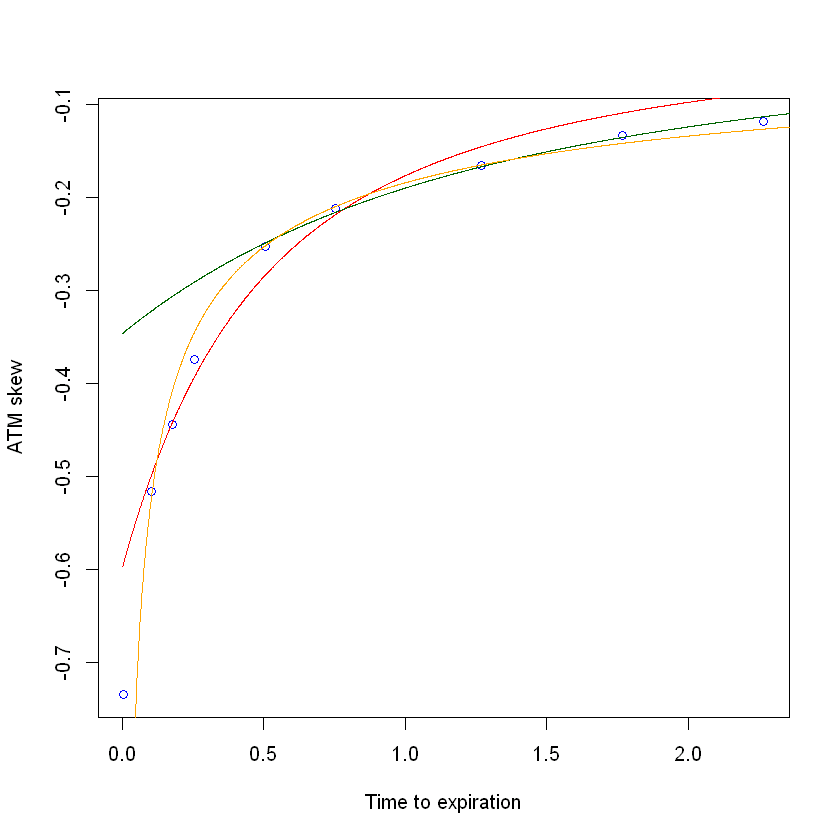

In [326]:
#(e)
x = seq(0,2.4,by=0.001)
plot(texp,atmSkews,col="blue",xlab="Time to expiration",ylab="ATM skew")
lines(x,skewHeston(fit1,x),col="red")
lines(x,skewHeston(fit2,x),col="dark green")
lines(x,skewPowerLaw(fit3[1],x),col="orange")
#curve(skewHeston(fit2,x),from=0,to=2,col="dark green",add=T)

#curve(atmSkews[5]*(texp[5]/x)^fitPL,from=0,to=2,col="orange",add=T)

In [335]:
#(f)
plotIvolsHeston <- function (ivolData, sviMatrix = NULL, slices = NULL) 
{
    bidVols <- as.numeric(ivolData$Bid)
    askVols <- as.numeric(ivolData$Ask)
    expDates <- unique(ivolData$Texp)
    nSlices <- length(expDates)
    if (!is.null(slices)) {
        nSlices <- length(slices)
    }
    else {
        slices <- 1:nSlices
    }
    colnum <- sqrt(nSlices * 2)
    rows <- round(colnum/2, 0)
    columns <- round(colnum, 0)
    while (rows * columns < nSlices) {
        rows <- rows + 1
    }
    atmVol <- numeric(nSlices)
    atmSkew <- numeric(nSlices)
    par(mfrow = c(rows, columns), mex = 0.5)
    for (slice in slices) {
        t <- expDates[slice]
        texp <- ivolData$Texp
        bidVol <- bidVols[texp == t]
        askVol <- askVols[texp == t]
        midVol <- (bidVol + askVol)/2
        f <- (ivolData$Fwd[texp == t])[1]
        k <- log(ivolData$Strike[texp == t]/f)
        include <- !is.na(bidVol)
        kmin <- min(k[include])
        kmax <- max(k[include])
        ybottom <- 0.8 * min(bidVol[include])
        ytop <- 1.2 * max(askVol[include], na.rm = T)
        xrange <- c(kmin, kmax)
        yrange <- c(ybottom, ytop)
        plot(k, bidVol, col = "red", pch = 18, cex = 0.5, xlim = xrange, 
            ylim = yrange, main = paste("T =", format(t, digits = 2, 
                nsmall = 2)), xlab = "Log-Strike", ylab = "Implied Vol.")
        par(new = T)
        plot(k, askVol, col = "blue", pch = 18, cex = 0.5, xlim = xrange, 
            ylim = yrange, main = NA, xlab = NA, ylab = NA)
        paramsFit1 <- list(lambda = fit1[2],rho = -0.7,eta = fit2[1] / (-0.7),vbar = 0.04,v = 0.04) 
        ImpliedVols <- sapply(k,function(x){impvolHeston(paramsFit1)(x,t)}) 
        lines(k,ImpliedVols)
        if ((!is.null(sviMatrix))) {
            vol <- function(k) {
                sqrt(svi(sviMatrix[slice, ], k)/t)
            }
            par(new = T)
            curve(vol(x), from = kmin, to = kmax, col = "orange", 
                lwd = 2, add = T)
        }
        kIn <- k[!is.na(midVol)]
        volIn <- midVol[!is.na(midVol)]
        volInterp <- function(xout) {
            stinterp(x = kIn, y = volIn, xout)$y
        }
        atmVol[slice] <- volInterp(0)
        atmSkew[slice] <- (volInterp(0.01) - volInterp(-0.01))/0.02
    }
    par(mfrow = c(1, 1), mex = 1)
    par(new = F)
    return(list(expiries = expDates, atmVol = atmVol, atmSkew = atmSkew))
}

$expiries
 [1] 0.005479452 0.021917808 0.041095890 0.101369863 0.178196347 0.254908676
 [7] 0.290525114 0.504109589 0.539726027 0.753424658 0.789041096 1.271347032
[13] 1.769863014 2.268607306

$atmVol
 [1] 0.1779891 0.3032678 0.2952338 0.2824867 0.2878321 0.2849292 0.2854094
 [8] 0.2799286 0.2808496 0.2759345 0.2762182 0.2686831 0.2649695 0.2633060

$atmSkew
 [1] -1.3003211 -1.2615977 -1.0912598 -0.8863560 -0.6632888 -0.6116906
 [7] -0.5416827 -0.4531628 -0.4207039 -0.3399245 -0.3526073 -0.2875441
[13] -0.2527104 -0.2051341

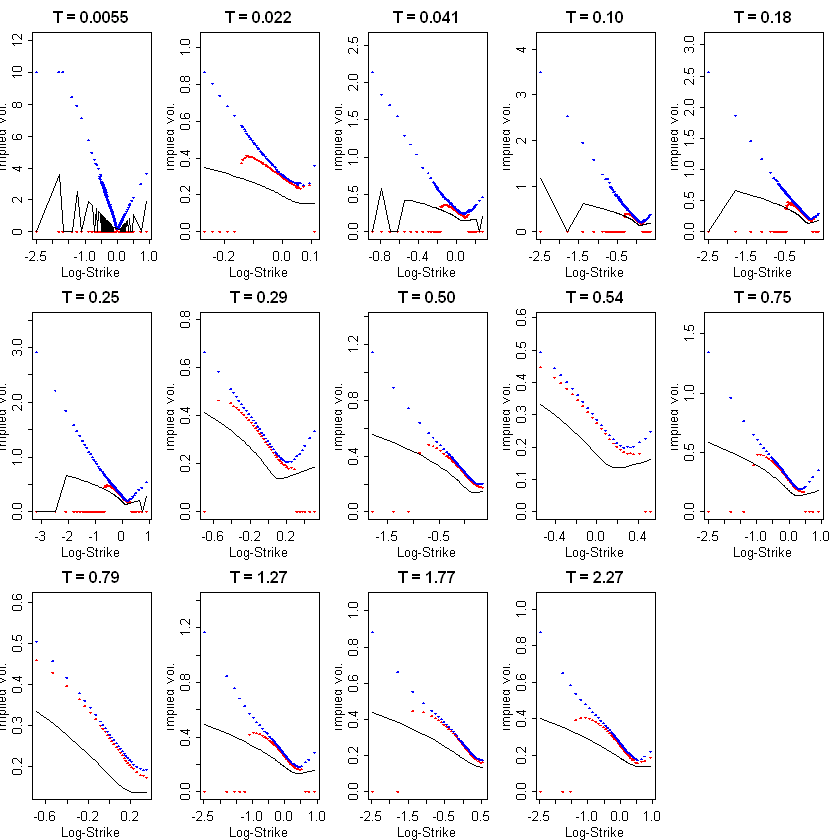

In [336]:
volSelect <- generateIvols(spxData110915)
volSelect <- volSelect[volSelect$cp_flag=="C",][,10:15]
volSelect <- volSelect[with(volSelect, order(Texp, Strike)), ]
plotIvolsHeston(volSelect)

Since Heston params was not calibrated to these point, the smile doesn't fit

(g)

Heston smiles are consistently below the empirical smiles, because heston model cannot have that much kink due to the fixed shape(fixed formulas), therefore lack of freedom.

Heston skews comparing with empirical skews may not match all the points very well, which is also due to the fixed shape (fixed formulas) , therefore lack of freedom.